# Genre Analysis

## Hypothesis - The greater the popularity of a movie genre, the more successful it will be.

Explore the frequency of different genres.
- In our dataset, the 'Comedy' genre has the highest frequency of movies, followed closely by 'Action' movies, both with over 1400. The least common movie genres, with under 5 movies each, are Western and Family movies. This displays a limitation of the dataset as each genre is not equally being represented. 

Which movie genres are the most popular?
- From the 'Average Votes per Movie Genre' chart, it is evident that some movie genres are more popular among viewers than others. 'Mystery' movies received the highest votes on average with over 250,000 votes. The next most popular genre are 'Family' movies with approximately 170,000 votes.
- With regards to the rating score, there is not a great deal of variation in the average ratings of each genre; majority of ratings fall between 6 and 7. The small variance indicates that the rating scores tend to be very close to the mean, and to each other, therefore the movie ratings data does not provide substantial evidence to explore the hypothesis. 

Which genre is the most successful?
- The highest grossing genre of movies with over $500 million profit are 'Family' movies, producing almost double than 'Animation' movies.

Is there a correlation between a movie genre's popularity and its success?
- Although there does seem to be a positive correlation between the average votes of movie genres and their success (gross profit), it is only a moderate correlation (0.51). Similarly, there is a weak correlation (0.32) between the average ratings and gross earnings of movie genres. This sugggests that in addition to genre, other factors may influence the success of a movie. 

In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = Path("../Resources/movies_cleaned.csv")
movies_df = pd.read_csv(csv_path)
movies_df.head()

,Movie_Name,Rating,Genre,Year,Rating_Score,Votes,Director,Writer,Star,Country,Budget,Gross,Company,Runtime,Release_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [4]:
# Explore the frequency of genres in the dataset
genre_count = movies_df.groupby(["Genre"]).count()["Movie_Name"]
genre_count

Genre
Action       1414
Adventure     327
Animation     277
Biography     310
Comedy       1494
Crime         396
Drama         859
Family          4
Fantasy        40
Horror        251
Mystery        16
Romance         5
Sci-Fi          6
Thriller        6
Western         2
Name: Movie_Name, dtype: int64

In [5]:
# Calculate the average of the rating score by genre
average_rating = movies_df.groupby(["Genre"])["Rating_Score"].mean()
average_rating = round(average_rating,2)
average_rating

Genre
Action       6.25
Adventure    6.27
Animation    6.69
Biography    7.09
Comedy       6.19
Crime        6.69
Drama        6.72
Family       6.68
Fantasy      6.03
Horror       5.83
Mystery      6.72
Romance      6.58
Sci-Fi       6.35
Thriller     5.90
Western      5.95
Name: Rating_Score, dtype: float64

In [6]:
rating_var = movies_df.groupby(["Genre"])["Rating_Score"].var()
rating_var = round(rating_var,2)
rating_var

Genre
Action       0.92
Adventure    1.21
Animation    0.83
Biography    0.37
Comedy       0.86
Crime        0.70
Drama        0.79
Family       0.88
Fantasy      0.60
Horror       0.77
Mystery      1.12
Romance      0.33
Sci-Fi       0.30
Thriller     0.54
Western      0.41
Name: Rating_Score, dtype: float64

In [7]:
# Calculate the average number of votes for each genre
average_votes = movies_df.groupby(["Genre"])["Votes"].mean()
average_votes = round(average_votes,0)
average_votes

Genre
Action       163453.0
Adventure    123237.0
Animation    147509.0
Biography    116429.0
Comedy        72055.0
Crime        114521.0
Drama        107997.0
Family       173225.0
Fantasy       62800.0
Horror        82039.0
Mystery      283219.0
Romance       67720.0
Sci-Fi       107283.0
Thriller      36367.0
Western        2850.0
Name: Votes, dtype: float64

In [8]:
# Calculate the average gross profit per genre
average_gross = movies_df.groupby(["Genre"])["Gross"].mean()
average_gross = round(average_gross,1)
average_gross

Genre
Action       168141946.7
Adventure    133268232.1
Animation    281104365.0
Biography     61592859.0
Comedy        59246193.0
Crime         50541622.9
Drama         60647808.2
Family       518583146.8
Fantasy       40860130.4
Horror        56816952.3
Mystery      125247363.9
Romance       33575381.0
Sci-Fi        37610102.3
Thriller      49492860.7
Western       10012943.0
Name: Gross, dtype: float64

In [9]:
# Create a DataFrame with the summary statistics for each genre
genre_summary = pd.DataFrame({"Movie Count":genre_count, 
                              "Average Rating Score":average_rating, 
                              "Rating Score Variance":rating_var,
                              "Average Votes":average_votes, 
                              "Average Gross":average_gross})
genre_summary


,Movie Count,Average Rating Score,Rating Score Variance,Average Votes,Average Gross
Genre,,,,,
Action,1414,6.25,0.92,163453.0,168141946.7
Adventure,327,6.27,1.21,123237.0,133268232.1
Animation,277,6.69,0.83,147509.0,281104365.0
Biography,310,7.09,0.37,116429.0,61592859.0
Comedy,1494,6.19,0.86,72055.0,59246193.0
Crime,396,6.69,0.70,114521.0,50541622.9
Drama,859,6.72,0.79,107997.0,60647808.2
Family,4,6.68,0.88,173225.0,518583146.8
Fantasy,40,6.03,0.60,62800.0,40860130.4


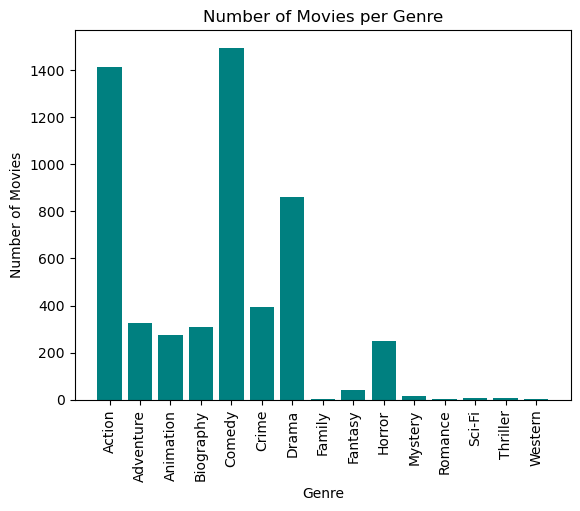

In [10]:
# Generate a bar chart showing the total number of movies for each genre
x_axis = genre_summary.index
y_axis = genre_summary["Movie Count"]
plt.bar(x_axis,y_axis,color="teal")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre")
plt.xticks(rotation=90)
plt.show()

The variation in the Average Rating Score is 0.14


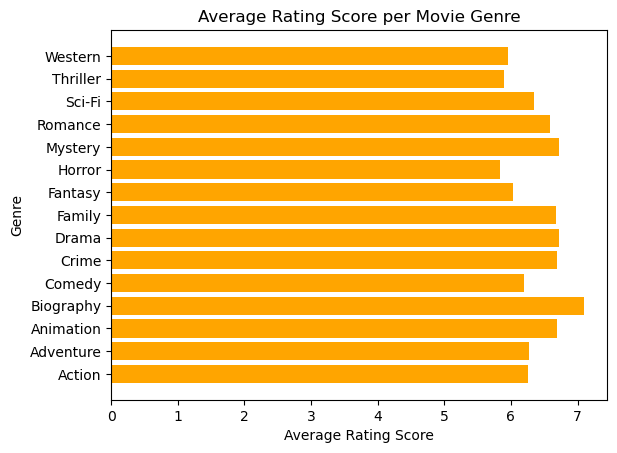

In [12]:
# Generate a chart to display the average rating per genre
genre = genre_summary.index
rating = genre_summary["Average Rating Score"]
variation = rating.var()
print(f'The variation in the Average Rating Score is {round(variation,2)}')
plt.barh(genre, rating, color="orange")
plt.ylabel("Genre")
plt.xlabel("Average Rating Score")
plt.title("Average Rating Score per Movie Genre")
plt.savefig("../Images/Average_rating_per_genre.png")
plt.show()

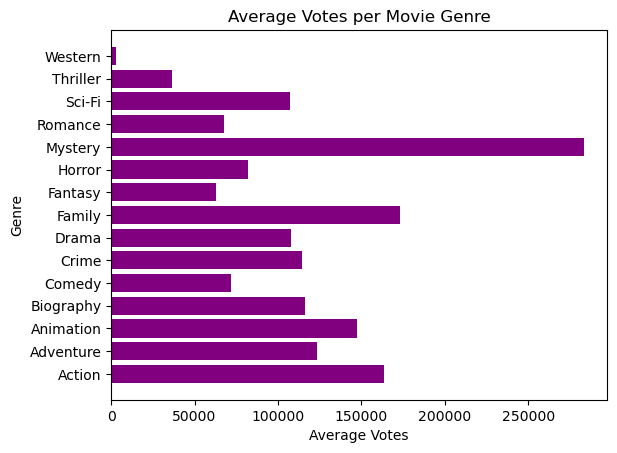

In [13]:
# Generate a chart to display the average votes per genre
genre = genre_summary.index
votes = genre_summary["Average Votes"]
plt.barh(genre, votes, color="purple")
plt.ylabel("Genre")
plt.xlabel("Average Votes")
plt.title("Average Votes per Movie Genre")
plt.savefig("../Images/Average_votes_per_genre.png")
plt.show()

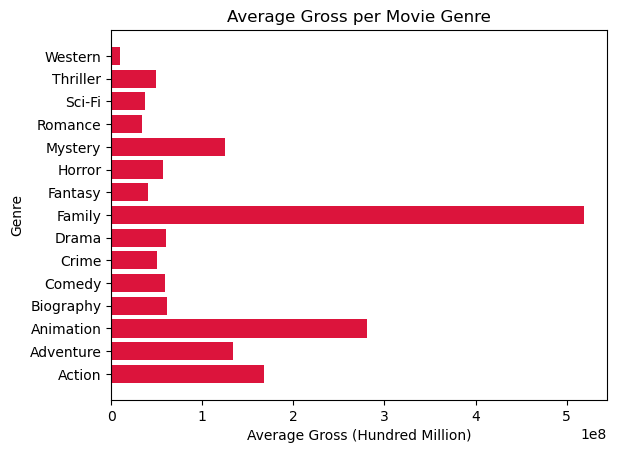

In [14]:
# Generate a chart to display average gross per genre
genre = genre_summary.index
gross = genre_summary["Average Gross"]
plt.barh(genre, gross, color="crimson")
plt.ylabel("Genre")
plt.xlabel("Average Gross (Hundred Million)")
plt.title("Average Gross per Movie Genre")
plt.savefig("../Images/Average_gross_per_genre.png")
plt.show()

The correlation between average rating and average gross per genre is 0.32
y = 113539127.33 x + -613746797.92


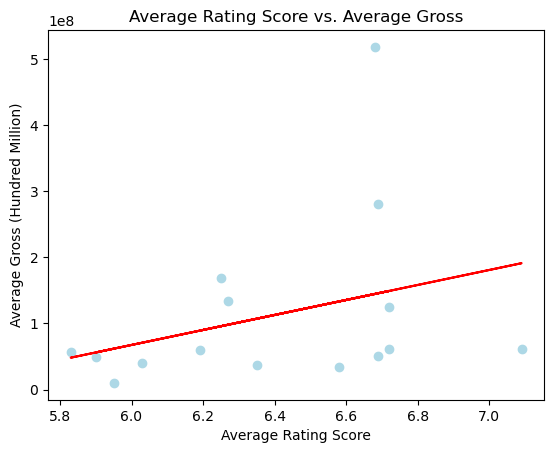

In [15]:
# Generate a scatter chart to determine whether the popularity of a genre (rating) has an effect on its success
rating = genre_summary["Average Rating Score"]
gross = genre_summary["Average Gross"]

correlation = st.pearsonr(rating, gross)
print(f"The correlation between average rating and average gross per genre is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(rating, gross)
regress_values = rating * slope + intercept
line_eq = print(f"y = {round(slope, 2)} x + {round(intercept, 2)}")

plt.scatter(rating, gross, color="lightblue")
plt.xlabel("Average Rating Score")
plt.ylabel("Average Gross (Hundred Million)")
plt.title("Average Rating Score vs. Average Gross")
plt.plot(rating, regress_values, color="red")
plt.savefig("../Images/rating_vs_gross.png")
plt.show()

The correlation between average votes and average gross per genre is 0.51
y = 1023.14 x + -825582.72


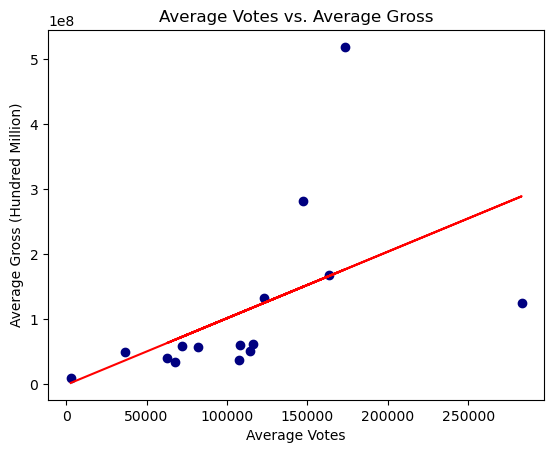

In [16]:
# Generate a scatter chart to determine whether the popularity of a genre (votes) has an effect on its success
votes = genre_summary["Average Votes"]
gross = genre_summary["Average Gross"]

correlation = st.pearsonr(votes, gross)
print(f"The correlation between average votes and average gross per genre is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(votes, gross)
regress_values = votes * slope + intercept
line_eq = print(f"y = {round(slope, 2)} x + {round(intercept, 2)}")

plt.scatter(votes, gross, color="navy")
plt.xlabel("Average Votes")
plt.ylabel("Average Gross (Hundred Million)")
plt.title("Average Votes vs. Average Gross")
plt.plot(votes, regress_values, color="red")
plt.savefig("../Images/votes_vs_gross.png")
plt.show()